In [375]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df_larceny = pd.concat(pd.read_excel("Latrocinio_2018_2022.xlsx", sheet_name=None), ignore_index=True)

df_larceny_sp = df_larceny[df_larceny["MUNICIPIO_CIRCUNSCRICAO"] == "São Paulo"]
df_larceny_sp.columns = map(str.lower, df_larceny_sp.columns)
df_larceny_sp.columns = map(str.strip, df_larceny_sp.columns)


df_larceny_sp



/home/davisf/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/davisf/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/davisf/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,departamento_circunscricao,seccional_circunscricao,municipio_circunscricao,dp_circunscricao,latro,nº de vit em latro,id_delegacia,mês estatistica,ano estatistica,datahora_registro_bo,...,longitude,tipo_pessoa,sexo_pessoa,idade_pessoa,data_nascimento_pessoa,cor_pele,profissao,natureza_apurada,ano,mês
0,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,1.0,1,10342,2018.0,1.0,2018-01-21,...,-46.645048,Vítima,Masculino,59.0,1958-02-18,Branca,JORNALISTA,LATROCÍNIO,NaN,NaN
1,DECAP,3ª SEC,São Paulo,037 DP - Campo Limpo,1.0,1,200100,2018.0,1.0,2018-01-20,...,-46.742773,Autor/Vitima,Masculino,27.0,1990-07-02,Branca,POLICIAL MILITAR,LATROCÍNIO,NaN,NaN
2,DECAP,3ª SEC,São Paulo,037 DP - Campo Limpo,1.0,1,10356,2018.0,1.0,2018-01-11,...,-46.757891,Vítima,Masculino,59.0,1958-08-09,Branca,NAO INFORMADA,LATROCÍNIO,NaN,NaN
3,DECAP,6ª SEC,São Paulo,092 DP - Parque Santo Antônio,1.0,1,10247,2018.0,1.0,2018-01-14,...,-46.758769,Vítima,Masculino,30.0,1987-03-12,Parda,GARÇON(ETE),LATROCÍNIO,NaN,NaN
4,DECAP,8ª SEC,São Paulo,055 DP - Parque São Rafael,1.0,1,10309,2018.0,1.0,2018-01-30,...,-46.465942,Vítima,Masculino,68.0,1949-11-12,Parda,APOSENTADO(A),LATROCÍNIO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,DECAP,3ª SEC,São Paulo,034 DP - Vila Sonia,1.0,1,10356,NaN,NaN,2022-12-17,...,NaN,Vítima,Masculino,56.0,1966-05-21,Branca,PROFESSOR(A),LATROCÍNIO,2022.0,12.0
988,DECAP,2ª SEC,São Paulo,035 DP - Jabaquara,1.0,1,10216,NaN,NaN,2022-12-06,...,NaN,Vítima,Masculino,38.0,1984-10-26,Branca,POLICIAL MILITAR,LATROCÍNIO,2022.0,12.0
989,DECAP,4ª SEC,São Paulo,039 DP - Vila Gustavo,1.0,1,10336,NaN,NaN,2022-12-24,...,-46.595094,Vítima,Masculino,25.0,1997-01-21,Branca,BANCARIO(A),LATROCÍNIO,2022.0,12.0
990,DECAP,6ª SEC,São Paulo,047 DP - Capão Redondo,1.0,1,10247,NaN,NaN,2022-12-20,...,-46.784165,Vítima,Masculino,32.0,1989-12-20,Branca,NaN,LATROCÍNIO,2022.0,12.0


In [376]:
df_larceny_sp["idade_pessoa"] = df_larceny_sp["idade_pessoa"].fillna(0).astype(int)
df_larceny_sp.drop(["latitude", "longitude", "mês estatistica", "ano estatistica", "natureza_apurada", "ano", "mês"], inplace=True, axis=1)
df_larceny_sp["profissao"] = df_larceny_sp["profissao"].fillna("Sem Registro")
df_larceny_sp["ano"] = df_larceny_sp["datahora_registro_bo"].apply(lambda x: x.year)
df_larceny_sp



/tmp/ipykernel_63203/3923927727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_larceny_sp["idade_pessoa"] = df_larceny_sp["idade_pessoa"].fillna(0).astype(int)
/tmp/ipykernel_63203/3923927727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_larceny_sp.drop(["latitude", "longitude", "mês estatistica", "ano estatistica", "natureza_apurada", "ano", "mês"], inplace=True, axis=1)
/tmp/ipykernel_63203/3923927727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,departamento_circunscricao,seccional_circunscricao,municipio_circunscricao,dp_circunscricao,latro,nº de vit em latro,id_delegacia,datahora_registro_bo,num_bo,ano_bo,...,desc_tipolocal,logradouro,numero_logradouro,tipo_pessoa,sexo_pessoa,idade_pessoa,data_nascimento_pessoa,cor_pele,profissao,ano
0,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,1.0,1,10342,2018-01-21,550,2018,...,Via pública,AVENIDA BRIGADEIRO LUIS ANTONIO,1572.0,Vítima,Masculino,59,1958-02-18,Branca,JORNALISTA,2018
1,DECAP,3ª SEC,São Paulo,037 DP - Campo Limpo,1.0,1,200100,2018-01-20,46,2018,...,Via pública,RUA COMEDIANTE MUSSUM,11.0,Autor/Vitima,Masculino,27,1990-07-02,Branca,POLICIAL MILITAR,2018
2,DECAP,3ª SEC,São Paulo,037 DP - Campo Limpo,1.0,1,10356,2018-01-11,266,2018,...,Via pública,RUA ZINDA GAMBAGORTE DE FRANCESCHI,62.0,Vítima,Masculino,59,1958-08-09,Branca,NAO INFORMADA,2018
3,DECAP,6ª SEC,São Paulo,092 DP - Parque Santo Antônio,1.0,1,10247,2018-01-14,433,2018,...,Via pública,RUA THEODOMIRO GARCIA,65.0,Vítima,Masculino,30,1987-03-12,Parda,GARÇON(ETE),2018
4,DECAP,8ª SEC,São Paulo,055 DP - Parque São Rafael,1.0,1,10309,2018-01-30,222,2018,...,Via pública,RUA FRANCISCO MARQUES,189.0,Vítima,Masculino,68,1949-11-12,Parda,APOSENTADO(A),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,DECAP,3ª SEC,São Paulo,034 DP - Vila Sonia,1.0,1,10356,2022-12-17,8634,2022,...,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,Vítima,Masculino,56,1966-05-21,Branca,PROFESSOR(A),2022
988,DECAP,2ª SEC,São Paulo,035 DP - Jabaquara,1.0,1,10216,2022-12-06,8731,2022,...,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,Vítima,Masculino,38,1984-10-26,Branca,POLICIAL MILITAR,2022
989,DECAP,4ª SEC,São Paulo,039 DP - Vila Gustavo,1.0,1,10336,2022-12-24,9731,2022,...,Via pública,RUA ROSA MARIA,55.0,Vítima,Masculino,25,1997-01-21,Branca,BANCARIO(A),2022
990,DECAP,6ª SEC,São Paulo,047 DP - Capão Redondo,1.0,1,10247,2022-12-20,9471,2022,...,Via pública,RUA VITOR BASTOS,28.0,Vítima,Masculino,32,1989-12-20,Branca,Sem Registro,2022


In [377]:
df_larceny_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 991
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   departamento_circunscricao  300 non-null    object        
 1   seccional_circunscricao     300 non-null    object        
 2   municipio_circunscricao     300 non-null    object        
 3   dp_circunscricao            300 non-null    object        
 4   latro                       294 non-null    float64       
 5   nº de vit em latro          300 non-null    int64         
 6   id_delegacia                300 non-null    int64         
 7   datahora_registro_bo        300 non-null    datetime64[ns]
 8   num_bo                      300 non-null    int64         
 9   ano_bo                      300 non-null    int64         
 10  municipio_elaboracao        300 non-null    object        
 11  dp_elaboracao               300 non-null    object        

In [378]:
df_larceny_sp_logra = df_larceny_sp.groupby(["logradouro"])
df_larceny_sp_logra["nº de vit em latro"].sum(numeric_only=True).head(10)

logradouro
ALAMEDA MINISTRO ROCHA AZEVEDO            2
AVENIDA ANDORINHA DOS BEIRAIS             1
AVENIDA ANTONELO DA MESSINA               1
AVENIDA ARICANDUVA                        1
AVENIDA BELISARIO PENA                    1
AVENIDA BENTO GUELFI                      1
AVENIDA BOAVENTURA JOSE RODRIGUES NETO    1
AVENIDA BRIGADEIRO LUIS ANTONIO           1
AVENIDA CAITITU                           1
AVENIDA CALIM EID                         1
Name: nº de vit em latro, dtype: int64

In [379]:
df_larceny_sp_job = df_larceny_sp.groupby(["profissao"])
df_larceny_sp_job["nº de vit em latro"].count().sort_values(ascending=False)

profissao
Sem Registro                      45
APOSENTADO(A)                     22
POLICIAL MILITAR                  17
MOTORISTA                         16
COMERCIANTE                       13
                                  ..
COZINHEIRO(A)                      1
COZINHEIRO(A)                      1
COSTUREIRO(A)                      1
CORTADOR                           1
ZELADOR(A)                         1
Name: nº de vit em latro, Length: 108, dtype: int64

<Axes: xlabel='profissao'>

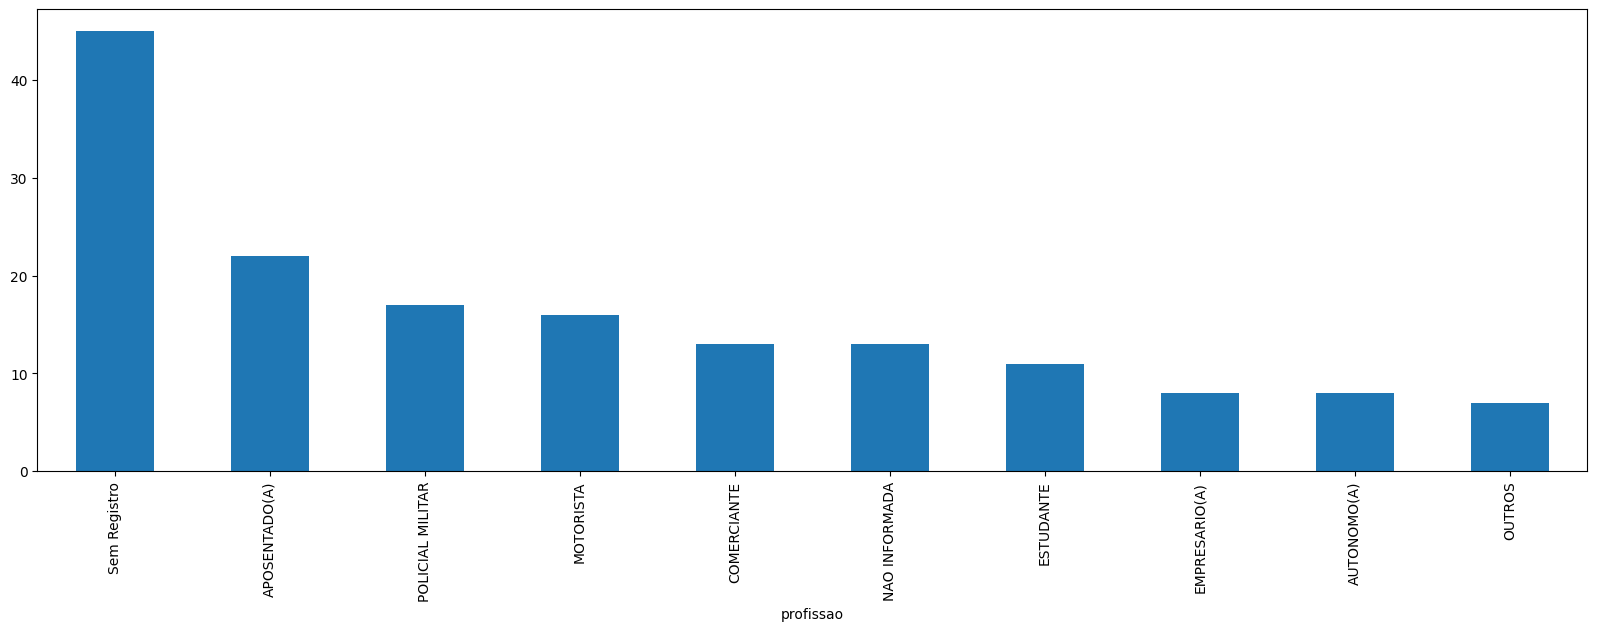

In [380]:
fig, ax = plt.subplots(figsize=(20,6))
df_larceny_sp.groupby("profissao")["nº de vit em latro"].count().sort_values(ascending=False).head(10).plot(kind="bar", ax=ax, x="profissao", y="nº de vit em latro")

<Axes: xlabel='ano'>

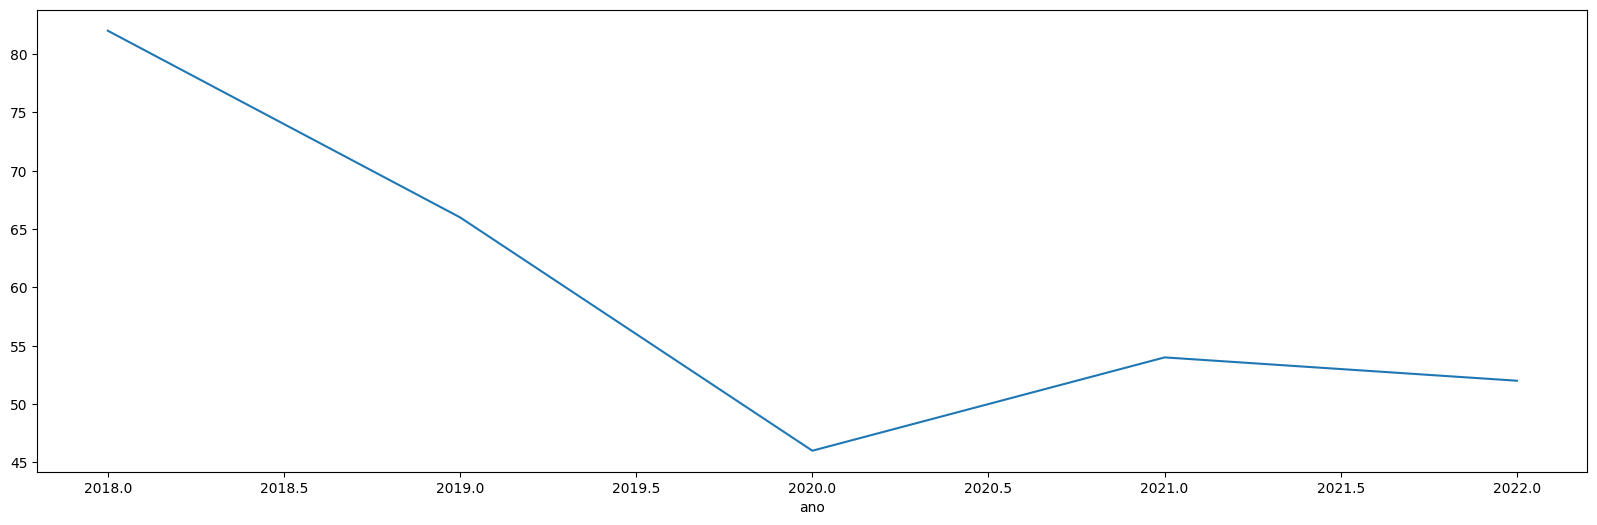

In [381]:
fig, ax = plt.subplots(figsize=(20,6))
df_larceny_sp.groupby("ano")["nº de vit em latro"].count().plot(kind="line", ax=ax, x="ano", y="nº de vit em latro")

In [382]:
df_larceny_sp.groupby("sexo_pessoa")[["nº de vit em latro"]].count()

,nº de vit em latro
sexo_pessoa,
Feminino,21
Masculino,279


<Axes: ylabel='sexo_pessoa'>

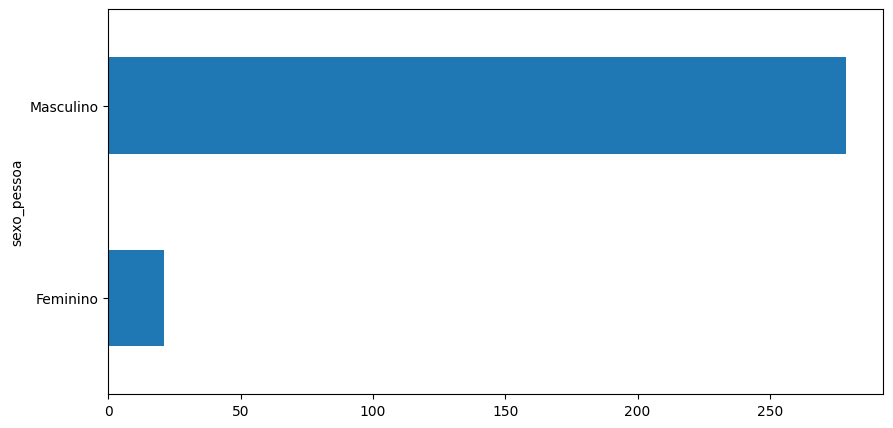

In [383]:
fig, ax = plt.subplots(figsize=(10,5))
df_larceny_sp.groupby("sexo_pessoa")["nº de vit em latro"].count().plot(kind="barh", ax=ax, x="sexo_pessoa", y="nº de vit em latro")

In [384]:
df_larceny_sp.groupby("cor_pele").count()

,departamento_circunscricao,seccional_circunscricao,municipio_circunscricao,dp_circunscricao,latro,nº de vit em latro,id_delegacia,datahora_registro_bo,num_bo,ano_bo,...,hora_fato,desc_tipolocal,logradouro,numero_logradouro,tipo_pessoa,sexo_pessoa,idade_pessoa,data_nascimento_pessoa,profissao,ano
cor_pele,,,,,,,,,,,,,,,,,,,,,
Amarela,11,11,11,11,11,11,11,11,11,11,...,11,11,11,7,11,11,11,11,11,11
Amarela,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Amarela,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Branca,161,161,161,161,158,161,161,161,161,161,...,161,161,161,129,161,161,161,159,161,161
Branca,14,14,14,14,14,14,14,14,14,14,...,14,14,14,12,14,14,14,14,14,14
Não informada,10,10,10,10,10,10,10,10,10,10,...,10,10,10,9,10,10,10,10,10,10
Parda,86,86,86,86,83,86,86,86,86,86,...,86,86,86,76,86,86,86,83,86,86
Parda,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Preta,13,13,13,13,13,13,13,13,13,13,...,13,13,13,10,13,13,13,12,13,13


In [385]:
df_larceny_sp_sex["cor_pele"] = df_larceny_sp_sex["cor_pele"].str.strip()

df_larceny_sp_pivot = pd.pivot_table(
  df_larceny_sp_sex,
  index="sexo_pessoa",
  columns="cor_pele",
  values="nº de vit em latro",
  aggfunc="count"
).fillna(0).astype(int)
df_larceny_sp_pivot

cor_pele,Amarela,Branca,Não informada,Parda,Preta,Vermelha
sexo_pessoa,,,,,,
Feminino,3,12,0,4,2,0
Masculino,10,163,10,83,12,1


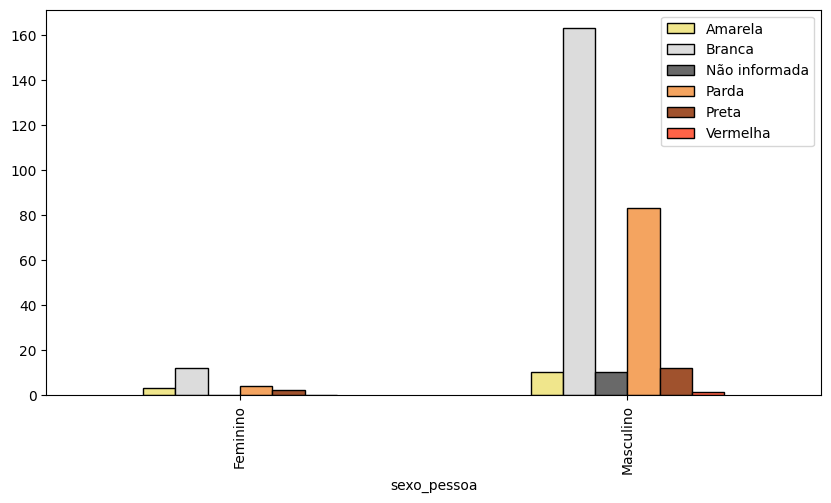

In [392]:
fig, ax = plt.subplots(figsize=(10,5))
df_larceny_sp_pivot.plot(kind="bar", ax=ax, color=["khaki", "gainsboro", "dimgray", "sandybrown", "sienna", "tomato"], edgecolor="black")
ax.legend(["Amarela", "Branca", "Não informada", "Parda", "Preta", "Vermelha"])